## Lab 4: Unsupervised Learning


Dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


Steps:
1. PCA implementation
2. K-means implementation

Then:

3. Exp1: Cluster using k-means + apply elbow method
4. Exp2: Cluster using PCA then k-means + apply elbow method
5. Apply Elbow Method for both experiments
6. Calculate errors for both experiments
7. Try different numbers of PC


8. OG labels VS output
9. Validate via PCA sklearn


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

1. Preprocessing Dataset

In [4]:
df = pd.read_csv("data.csv")


print(df.shape)

df = df.drop(columns=['Unnamed: 32'])

print(df.shape)

(569, 33)
(569, 32)


In [5]:
missing_values = df.isnull().sum()
df.shape

(569, 32)

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df = df.drop(columns='id') #dropping id
df.shape

(569, 31)

In [8]:
labels = df['diagnosis']
X = df.drop(columns='diagnosis')

In [9]:
print(X.shape)
X.dtypes

(569, 30)


,0
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64
fractal_dimension_mean,float64


array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>],
       [<Axes: title={'center': 'radius_se'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>],
       [<Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>,
        <Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'ce

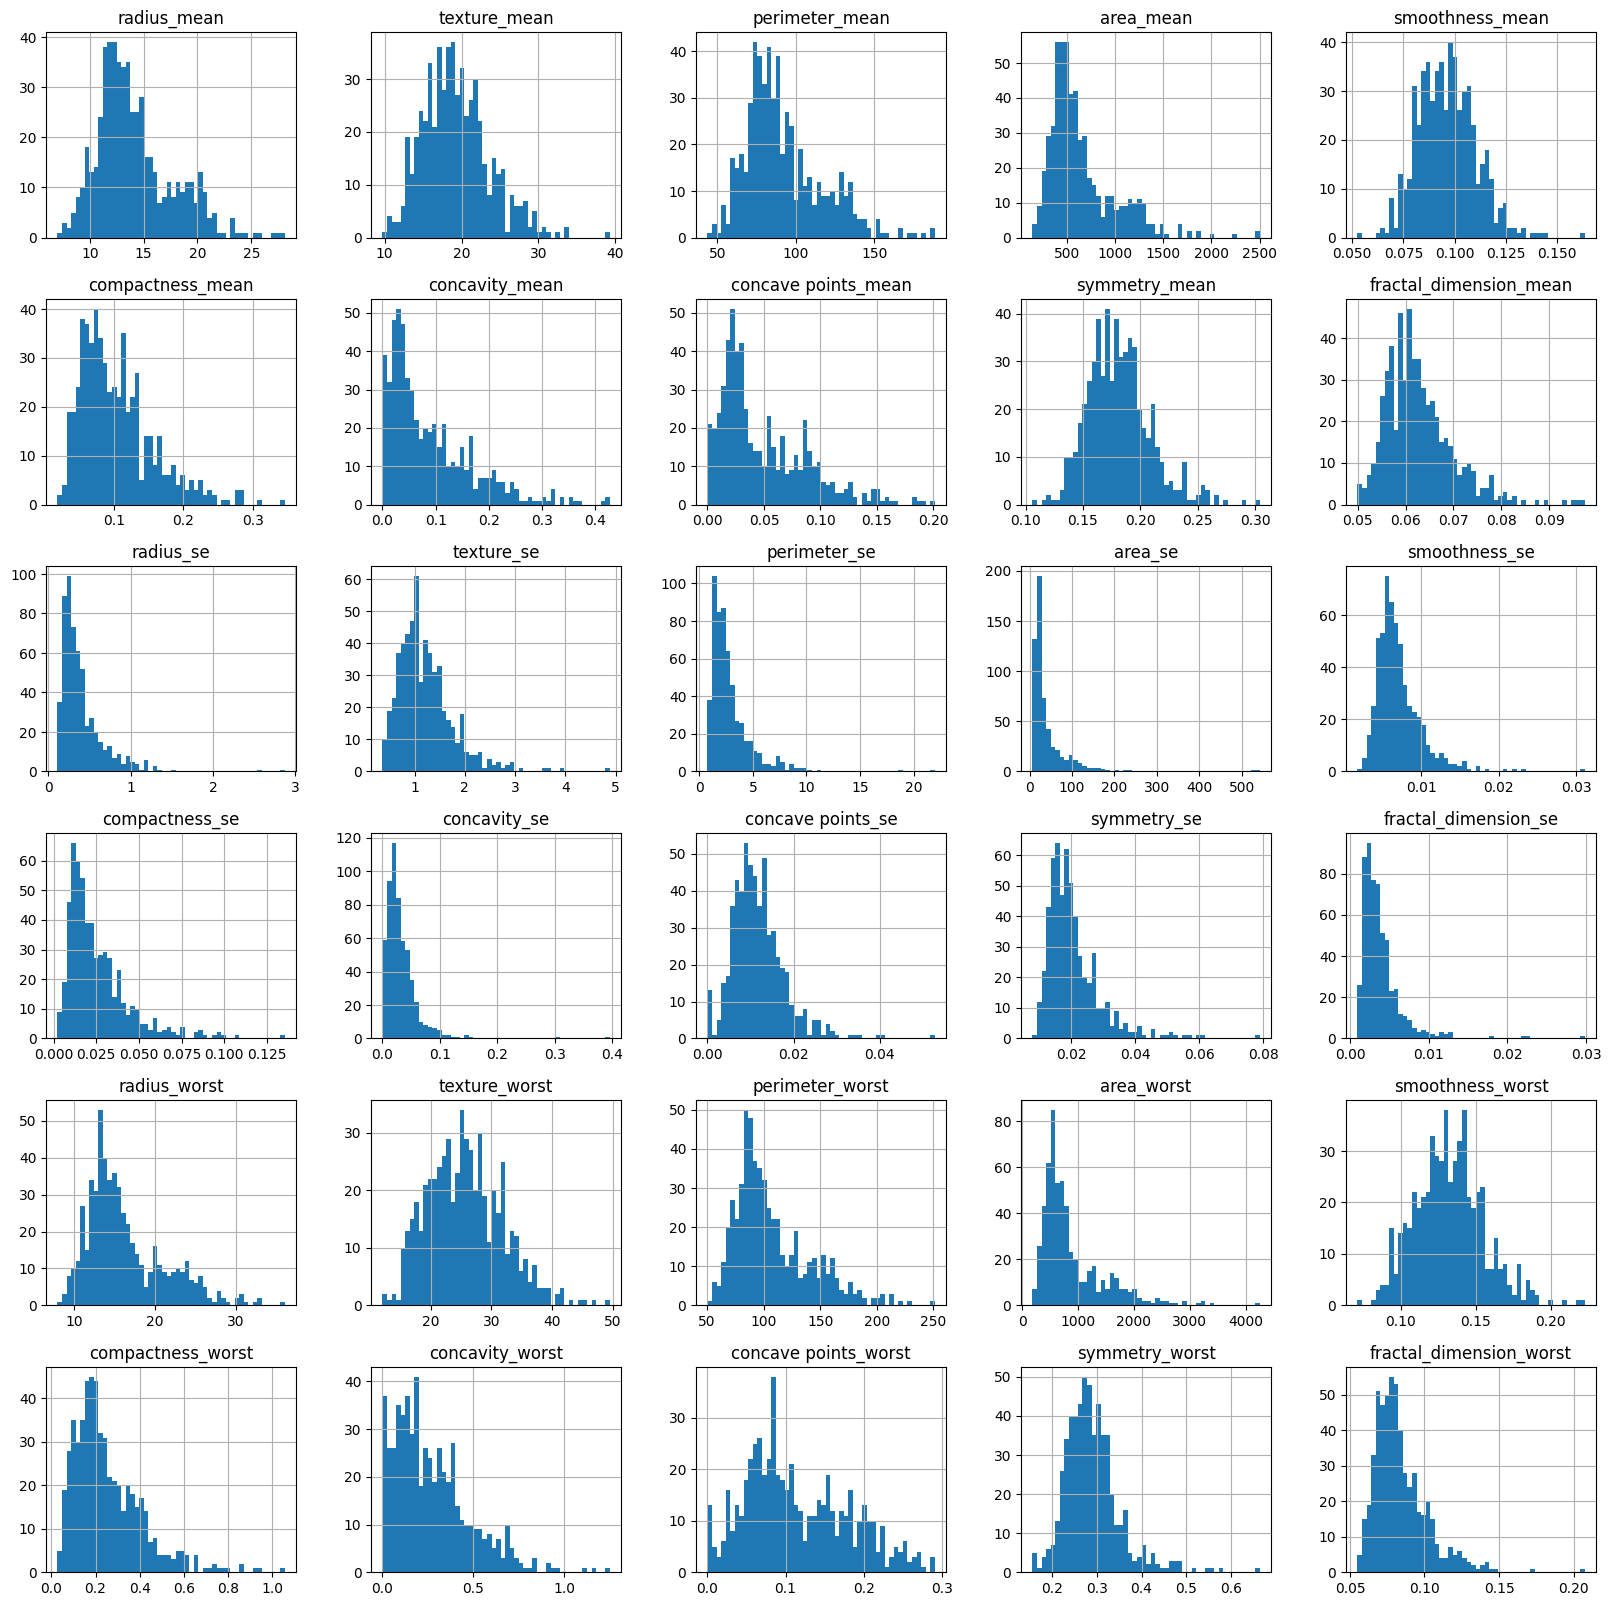

In [10]:
X.hist(bins=50, figsize=(20,20))

#### Now, we'll be working with 30 features
 1. Scaling since PCA is sensitive to the scale of data

## **1. PCA Implementation** (PCA COMPONENT ANALYSIS)

Steps:
1. Standardize data (normalization + feature scaling)
2. Compute covariance matrix
3. Eigen Decomposition
4. Sort by eigenvalues
5. Choose eigen vectors

In [11]:
class PCA:

    def __init__(self, k_components):
        self.k_components = k_components

    def fit(self, X):

        # Standardize data
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        self.scale[self.scale == 0] = 1
        X_std = (X - self.mean) / self.scale

        # Eigendecomposition of covariance matrix
        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)

        # Adjusting the eigenvectors that are largest in absolute value to be positive
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T

        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)

        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

        self.components = eig_vecs_sorted[:self.k_components,:]

        # Explained variance ratio: when components = n, ad eh men el original variance is captured ***
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.k_components]]
        # same as "up" but for all components together
        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)

        return X_proj


In [12]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
my_pca = PCA(k_components = 2).fit(X)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

X_proj_my_pca = my_pca.transform(X)
print('Transformed data shape from scratch:', X_proj_my_pca.shape)

Components:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]
Explained variance ratio from scratch:
 [0.44272025607526355, 0.18971182044033078]
Cumulative explained variance from scratch:
 [0.44272026 0.63243208]
Transformed data shape from scratch: (569, 2)


In [14]:
from sklearn.decomposition import PCA
sklearn_pca = PCA(n_components=2)
sklearn_pca.fit(X)
print("Explained variance ratio (sklearn):", sklearn_pca.explained_variance_ratio_)

# Transform the data using sklearn's PCA
X_proj_sklearn = sklearn_pca.transform(X)


Explained variance ratio (sklearn): [0.53097689 0.1728349 ]


Comparison between custom PCA and scikit PCA

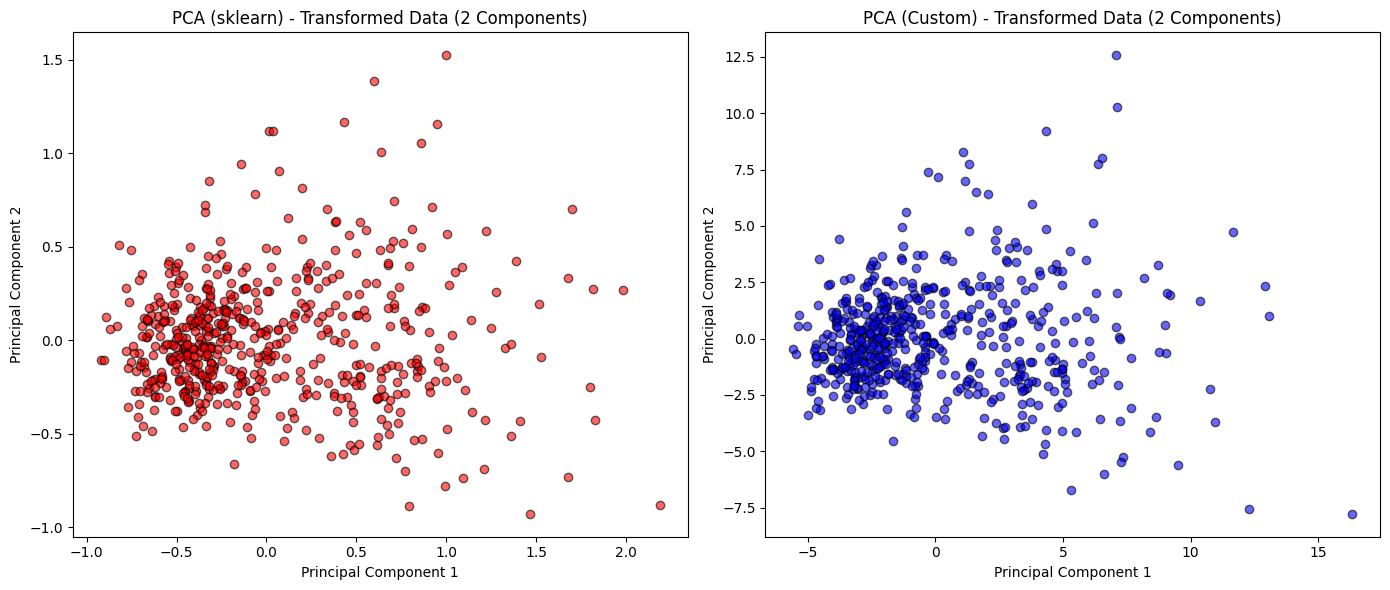

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot transformed data from sklearn's PCA
axes[0].scatter(X_proj_sklearn[:, 0], X_proj_sklearn[:, 1], c='red', edgecolor='k', alpha=0.6)
axes[0].set_title('PCA (sklearn) - Transformed Data (2 Components)')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')

# Plot transformed data from custom PCA
axes[1].scatter(X_proj_my_pca[:, 0], X_proj_my_pca[:, 1], c='blue', edgecolor='k', alpha=0.6)
axes[1].set_title('PCA (Custom) - Transformed Data (2 Components)')
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## **2. K-MEANS IMPLEMENTATION**

In [16]:
class KMeans:
    def __init__(self, n_clusters, max_iter=300):

        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.labels = None

    def fit(self, X):
        # centroids init
        np.random.seed(42)  # (for reproducibility??)
        random_indices = np.random.permutation(X.shape[0])[:self.n_clusters]
        self.centroids = X[random_indices]

        for _ in range(self.max_iter):
            # point to nearest centroid
            distances = self._compute_distances(X)
            self.labels = np.argmin(distances, axis=1)

            # centroids are mean of assigned points
            new_centroids = np.array([
                X[self.labels == k].mean(axis=0) if np.any(self.labels == k) else self.centroids[k]
                for k in range(self.n_clusters)
            ])

            # if no change in centroids
            if np.all(new_centroids == self.centroids):
                break

            self.centroids = new_centroids

    def _compute_distances(self, X):
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)

    def predict(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)


# **Experiments**

Implementation of Elbow Method

Resources: [Elbow Method](https://www.statology.org/elbow-method-in-python/)

In [17]:
def elbow_method(X, max_k=10):
    sse = [] # sum of squared errors
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(X)
        sse.append(np.sum(np.min(kmeans._compute_distances(X), axis=1) ** 2))
    return sse

## Experiment 1
- Cluster the dataset using k-means.
- Apply the elbow method to find the best Number (local minimum)
of k clusters.
- Compare between the sum of square errors/distances.

In [18]:
# Experiment 1: K-Means Clustering with Visualization
def experiment_kmeans(X):
    print("Running Experiment 1: K-Means Clustering")
    sse = elbow_method(X)

    # Compare between the sum of square errors/distances
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(sse) + 1), sse, marker='o')
    plt.title('Elbow Method for K-Means')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.show()

    # Find optimal number of clusters
    optimal_k = np.argmin(np.gradient(np.gradient(sse))) + 1
    print(f"Optimal number of clusters (k): {optimal_k}")

    # Fit K-Means with optimal k
    kmeans = KMeans(n_clusters=optimal_k)
    kmeans.fit(X)
    labels_optimal = kmeans.labels

    # Fit K-Means with k = 2 (non-optimal)
    kmeans_2 = KMeans(n_clusters=2)
    kmeans_2.fit(X)
    labels_2 = kmeans_2.labels

    # Plot the clusters for optimal k
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels_optimal, cmap='viridis', s=50)
    plt.title(f"K-Means Clustering with k = {optimal_k}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    # Plot the clusters for k = 2
    plt.figure(figsize=(8, 5))
    plt.scatter(X[:, 0], X[:, 1], c=labels_2, cmap='viridis', s=50)
    plt.title("K-Means Clustering with k = 2")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

    return labels_optimal, sse

Running Experiment 1: K-Means Clustering


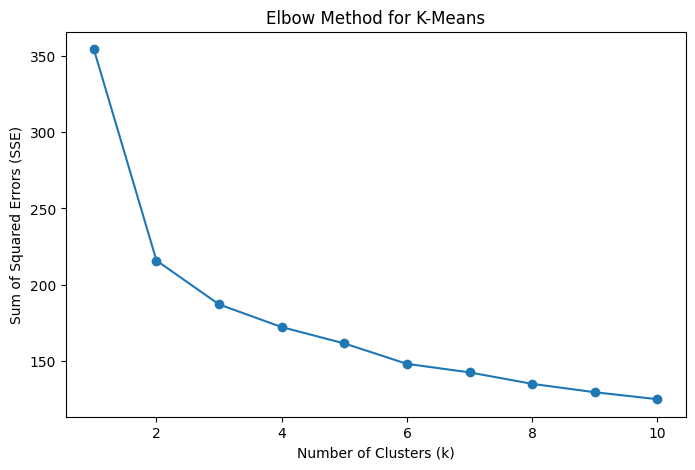

Optimal number of clusters (k): 10


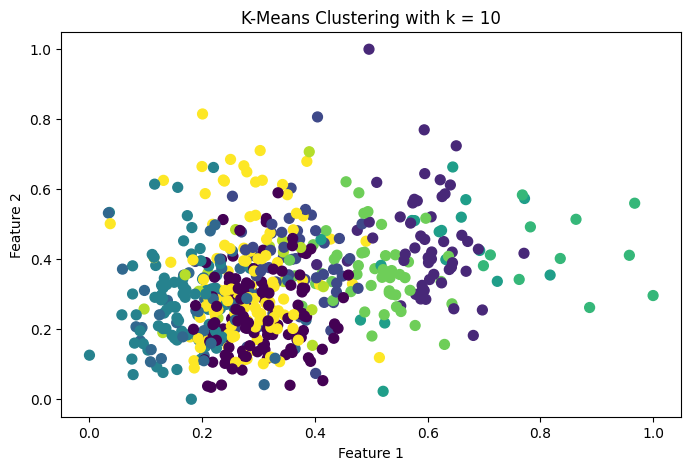

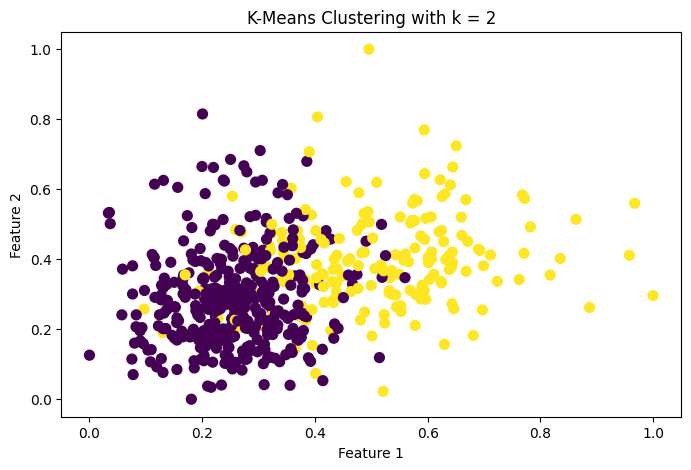

In [19]:
labels_exp1, sse_exp1 = experiment_kmeans(X)

## Experiment 2
- Apply PCA then cluster the dataset using k-means.
- Apply the elbow method to find the best Number (local minimum)
of k clusters.
- Compare between the sum of square errors/distances.
- Experiment with different numbers of principal components.
- Visualize the results and compare it with the original labels.

In [20]:
def experiment_pca_kmeans(X, n_components_list):
    print("Running Experiment 2: PCA + K-Means Clustering")
    results = {}
    for k_components in n_components_list:
        # Apply PCA
        pca = PCA(k_components).fit(X)
        X_pca = pca.transform(X)

        # Apply Elbow Method
        sse = elbow_method(X_pca)
        optimal_k = np.argmin(np.gradient(np.gradient(sse))) + 1

        print(f"For {k_components} components, optimal k: {optimal_k}")

        # Fit K-Means with optimal k
        kmeans = KMeans(n_clusters=optimal_k)
        kmeans.fit(X_pca)
        labels_optimal = kmeans.labels

        # Fit K-Means with k = 2 (non-optimal)
        kmeans_2 = KMeans(n_clusters=2)
        kmeans_2.fit(X_pca)
        labels_2 = kmeans_2.labels

        # Store results
        results[k_components] = (optimal_k ,labels_optimal, sse, pca)

        # Compare between the sum of square errors/distances
        plt.figure(figsize=(8, 5))
        plt.plot(range(1, len(sse) + 1), sse, marker='o')
        plt.title(f'Elbow Method for K-Means (PCA with {k_components} Components)')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Sum of Squared Errors (SSE)')
        plt.show()

        # Side-by-side cluster plots
        fig, axs = plt.subplots(1, 2, figsize=(16, 6), constrained_layout=True)

        # Plot clusters for optimal k
        axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_optimal, cmap='viridis', s=50)
        axs[0].set_title(f"K-Means Clustering with k = {optimal_k} (PCA with {k_components} Components)")
        axs[0].set_xlabel("PCA Component 1")
        axs[0].set_ylabel("PCA Component 2")

        # Plot clusters for k = 2
        axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_2, cmap='viridis', s=50)
        axs[1].set_title(f"K-Means Clustering with k = 2 (PCA with {k_components} Components)")
        axs[1].set_xlabel("PCA Component 1")
        axs[1].set_ylabel("PCA Component 2")

        plt.show()

    return results

Running Experiment 2: PCA + K-Means Clustering
For 2 components, optimal k: 6


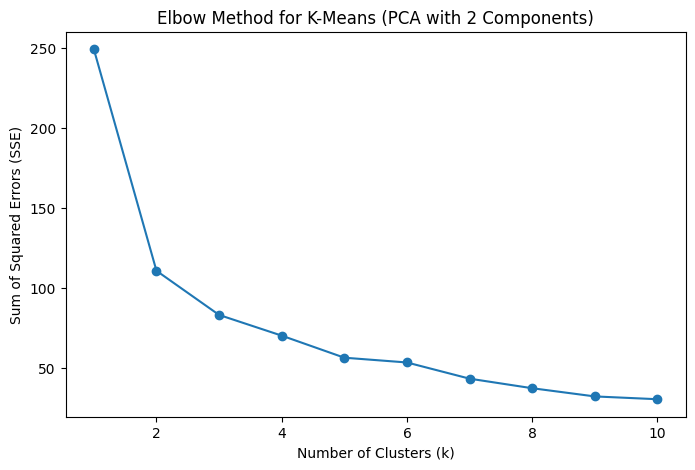

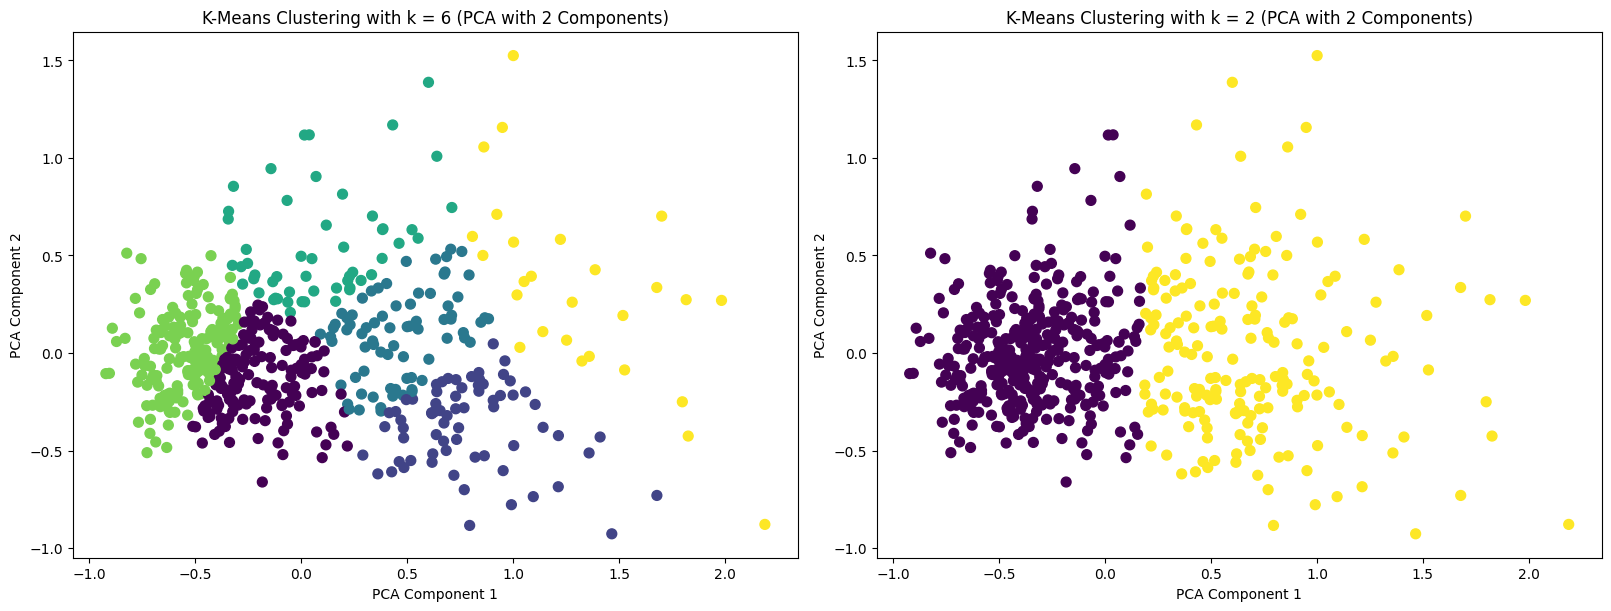

For 5 components, optimal k: 7


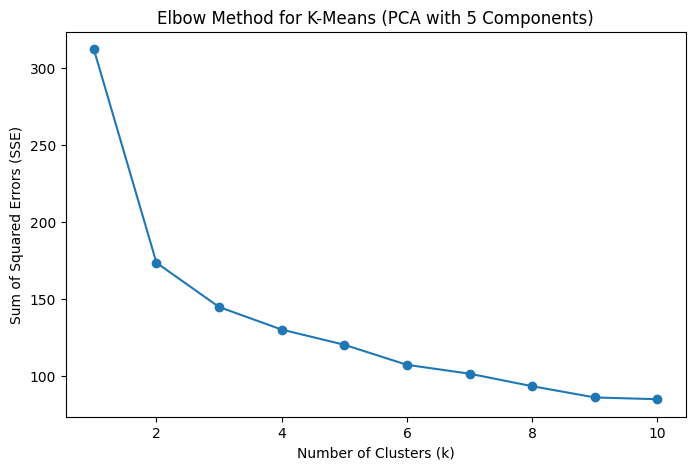

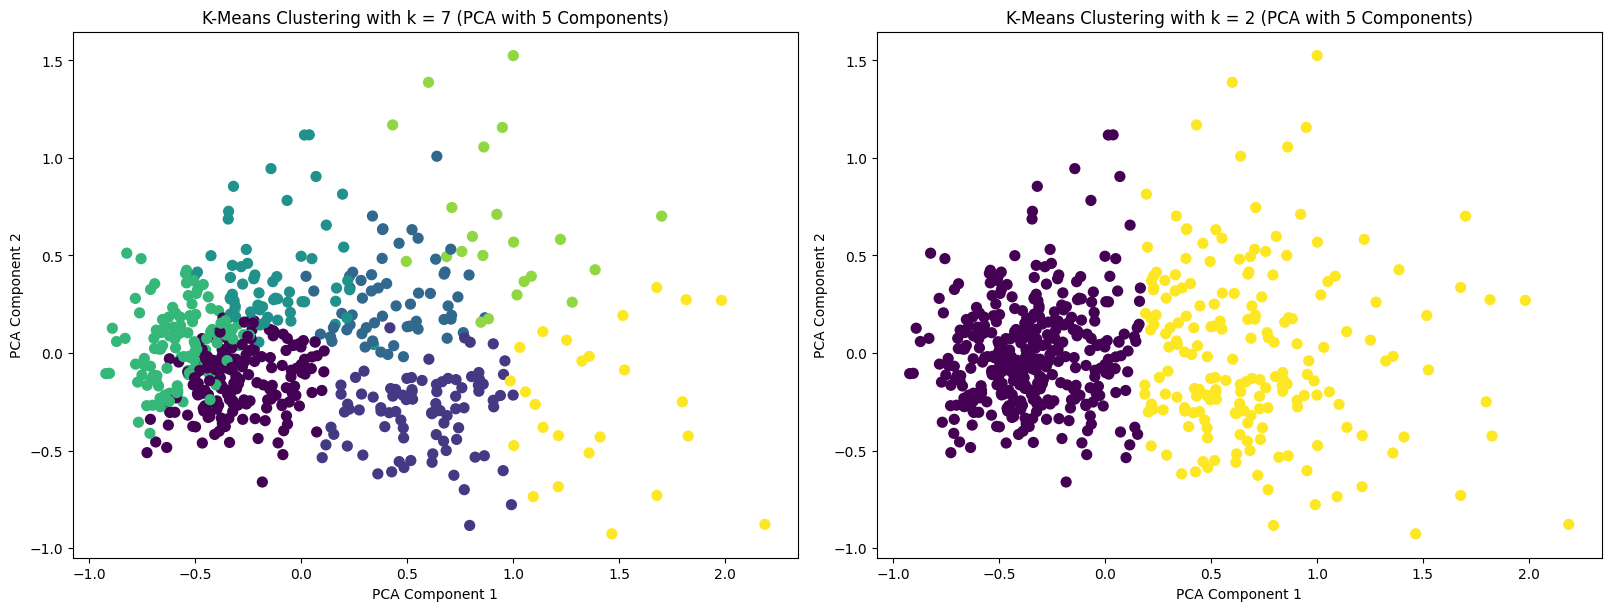

For 10 components, optimal k: 10


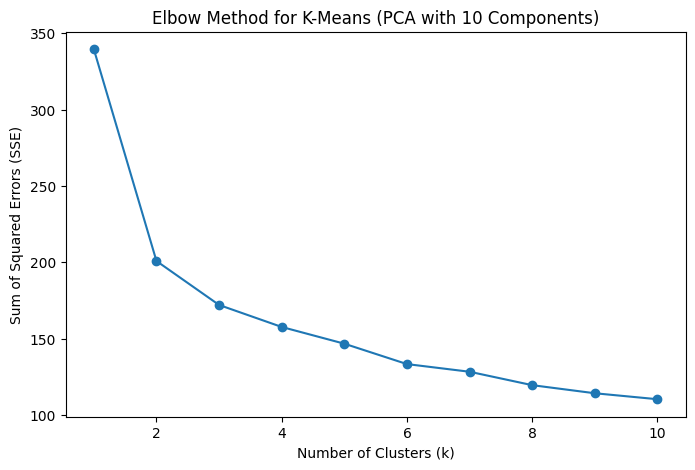

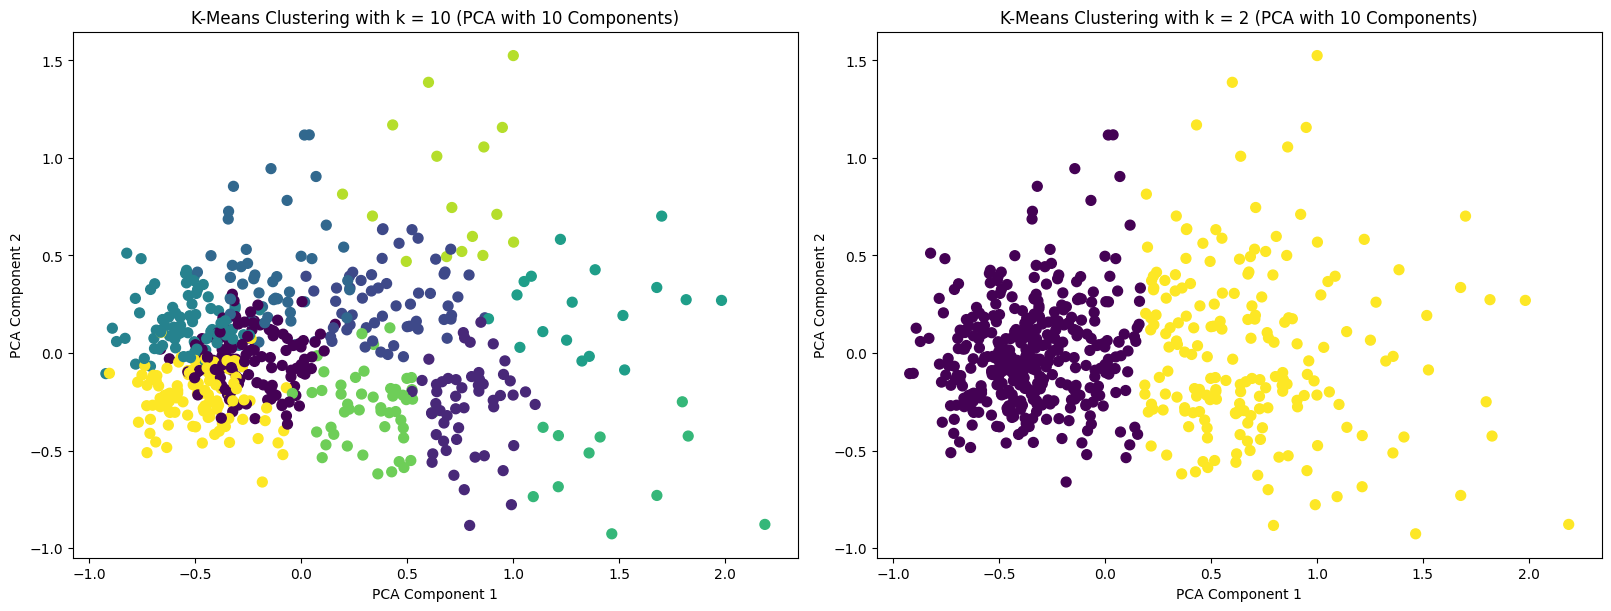

In [21]:
principal_components = [2, 5, 10]
pca_results = experiment_pca_kmeans(X, principal_components)

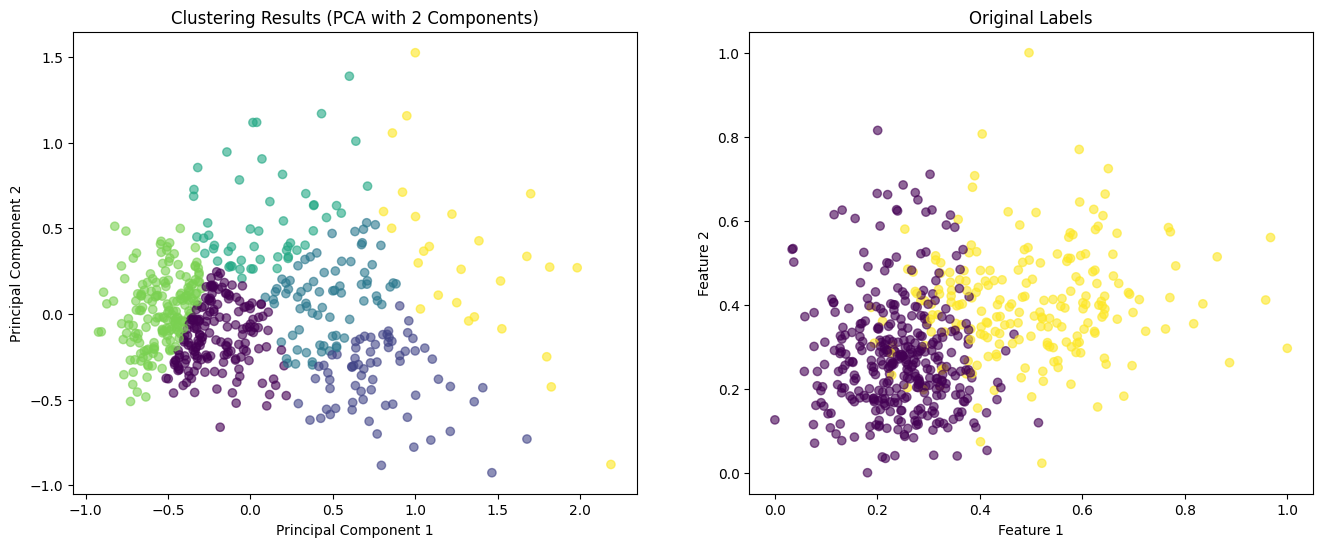

In [22]:
# Visualize clustering results for 2 components and compare the results with the original labels
pca_2d = pca_results[2][3]  # PCA object for 2 components
X_pca_2d = pca_2d.transform(X)

plt.figure(figsize=(16, 6))

# Plot clustering results (PCA with 2 Components)
plt.subplot(1, 2, 1)
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c = pca_results[2][1], cmap='viridis', alpha=0.6)
plt.title('Clustering Results (PCA with 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Plot original labels
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_encoded, cmap='viridis', alpha=0.6)
plt.title('Original Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

In [23]:
# Compare SSE
print("SSE Comparison:")
print(f"Without PCA: {sse_exp1}")
for n_components, (optimal_k, labels_optimal, sse, pca) in pca_results.items():
    print(f"With PCA ({n_components} components): {sse}")

SSE Comparison:
Without PCA: [354.43661334440094, 215.83831972044857, 187.0302526444141, 172.17228708311004, 161.44543662231632, 148.049739945995, 142.45048602972932, 134.9251030917049, 129.43104289839874, 124.85206251080322]
With PCA (2 components): [249.45666732722734, 110.97150878308206, 83.37197137033978, 70.43520033282982, 56.64519800000032, 53.65969246790227, 43.53310940776008, 37.56450339181876, 32.438923634578146, 30.69067765516286]
With PCA (5 components): [311.8792386350591, 173.3318997381234, 144.62083363548078, 129.9724436336291, 120.12220765672296, 107.11416370263962, 101.35725032183859, 93.24297092247068, 85.94243339442275, 84.79496247837575]
With PCA (10 components): [339.44617961048317, 200.88032080488387, 172.12055630655414, 157.73369789083034, 146.77827635981345, 133.44148164482755, 128.42867736403394, 119.65236726798393, 114.35939165566526, 110.45712147762961]
